In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading the data in a dataframe df

header_list = ["text","intent","buffer"]
train=pd.read_csv("/content/train_10000_dpadded.csv" )
#valid = pd.read_csv("/content/drive/My Drive/english_hope_dev.csv", '\t',header=None,names=header_list)


In [ ]:
valid = pd.read_csv("/content/valid_preprocessed.csv")

In [ ]:
valid.head()

,Unnamed: 0,text,intent
0,0,that it like I do not like that statue,Non_hope_speech
1,1,Counting money that she be give for promote hy...,Non_hope_speech
2,2,Hernandez never say to be intolerant and hateful,Non_hope_speech
3,3,wow an opinion be that I do not like color,Non_hope_speech
4,4,WOWThat be so so inspiring and incredible this...,Hope_speech


In [ ]:
df_train = pd.DataFrame(train)
df_train.head(9)

,Unnamed: 0,text,intent
0,32472,KEEP PEACE of LOVE your heart,Hope_speech
1,13545,She will always be Madonna without her,Non_hope_speech
2,10577,in probably of the most non racist people you ...,Non_hope_speech
3,8647,Linda Godinez to compare the state of the indu...,Non_hope_speech
4,4790,this be so inspiring,Hope_speech
5,10339,It be like look into the past at my own self l...,Non_hope_speech
6,3300,what they be say be Black Live matter more,Non_hope_speech
7,26999,I which in love with loving such would not cha...,Hope_speech
8,8902,what legacy He be on fentynal and shove pistol...,Non_hope_speech


In [ ]:
train = train.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_train["intent"] = df_train["intent"].replace(to_replace ="Non_hope_speech", value =0)
df_train["intent"] = df_train["intent"].replace(to_replace ="Hope_speech", value =1)
df_train["intent"].unique()

array([1, 0])

In [ ]:
valid.intent.unique()

array(['Non_hope_speech', 'Hope_speech'], dtype=object)

In [ ]:
valid["intent"] = valid["intent"].replace(to_replace ="Non_hope_speech", value =0)
valid["intent"] = valid["intent"].replace(to_replace ="Hope_speech", value =1)
valid["intent"].unique()

array([0, 1])

In [ ]:
train.intent.unique()

array(['Hope_speech', 'Non_hope_speech'], dtype=object)

In [ ]:
train.isnull().sum()

text      6
intent    0
dtype: int64

In [ ]:
train.dropna(inplace=True)
train.isnull().sum()

text      0
intent    0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Unnamed: 0    0
text          0
intent        0
dtype: int64

In [ ]:
valid.dropna(inplace=True)
valid.isnull().sum()

Unnamed: 0    0
text          0
intent        0
dtype: int64

In [ ]:
x_train = df_train['text']
y_train = df_train['intent']

In [ ]:
y_train = df_train['intent']

In [ ]:
x_test = valid['text']
y_test = valid['intent']

In [ ]:
y_test = valid['intent']

Text(0, 0.5, 'Frequency')

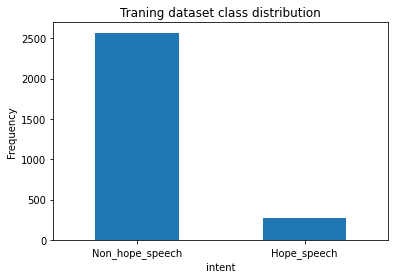

In [ ]:
LABELS = ["Non_hope_speech","Hope_speech"]

count_classes = pd.value_counts(valid['intent'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Traning dataset class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("intent")
plt.ylabel("Frequency")

In [ ]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# instantiating the tokenizer
max_vocab = 50000
tokenizer = Tokenizer(num_words=max_vocab , lower=None)
tokenizer.fit_on_texts(x_train)

In [ ]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  21755


In [ ]:
# converting trian and valid sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
valid_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])


Training sequence:  [3069, 2873, 8, 1132, 49, 355]


In [ ]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the training sequence
pad_train = pad_sequences(train_seq)
pad_test = pad_sequences(valid_seq, maxlen=205)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  205


In [ ]:
pad_test = pad_sequences(valid_seq, maxlen=205)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pad_train, y_train,train_size=1)

In [ ]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [ ]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
r = model.fit(pad_train,y_train, validation_data=(pad_test,y_test), epochs=5)

Epoch 1/5
1023/1023 [==============================] - 88s 86ms/step - loss: 0.1692 - accuracy: 0.9322 - val_loss: 0.2905 - val_accuracy: 0.8951
Epoch 2/5
1023/1023 [==============================] - 89s 87ms/step - loss: 0.1314 - accuracy: 0.9483 - val_loss: 0.3308 - val_accuracy: 0.8814
Epoch 3/5
1023/1023 [==============================] - 87s 85ms/step - loss: 0.1062 - accuracy: 0.9588 - val_loss: 0.3509 - val_accuracy: 0.8838
Epoch 4/5
1023/1023 [==============================] - 87s 85ms/step - loss: 0.0893 - accuracy: 0.9645 - val_loss: 0.3807 - val_accuracy: 0.8888
Epoch 5/5
1023/1023 [==============================] - 88s 86ms/step - loss: 0.0747 - accuracy: 0.9718 - val_loss: 0.3865 - val_accuracy: 0.8969


In [ ]:
x_train.shape

(32734,)

In [ ]:
from sklearn import model_selection, metrics